In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
dataset=pd.read_csv('rain.csv')
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


# Exploratory Data Analysis

# Missing Values Features

First we check the missing features

In [3]:
nan_feature=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]
nan_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [4]:
for feature in nan_feature:
    print(feature,np.round(dataset[feature].isnull().mean(),4), '%')

MinTemp 0.0045 %
MaxTemp 0.0023 %
Rainfall 0.0099 %
Evaporation 0.4279 %
Sunshine 0.4769 %
WindGustDir 0.0656 %
WindGustSpeed 0.0652 %
WindDir9am 0.0704 %
WindDir3pm 0.0266 %
WindSpeed9am 0.0095 %
WindSpeed3pm 0.0185 %
Humidity9am 0.0125 %
Humidity3pm 0.0254 %
Pressure9am 0.0986 %
Pressure3pm 0.0983 %
Cloud9am 0.3774 %
Cloud3pm 0.4015 %
Temp9am 0.0064 %
Temp3pm 0.0192 %
RainToday 0.0099 %


0    141556
1       637
Name: MinTemp, dtype: int64


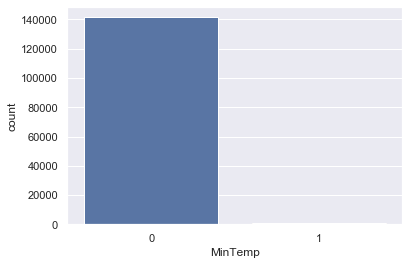

0    141871
1       322
Name: MaxTemp, dtype: int64


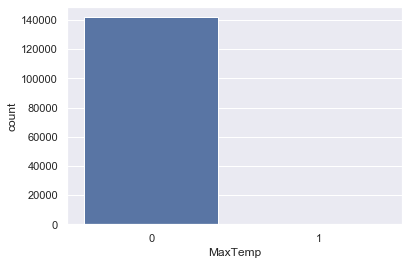

0    140787
1      1406
Name: Rainfall, dtype: int64


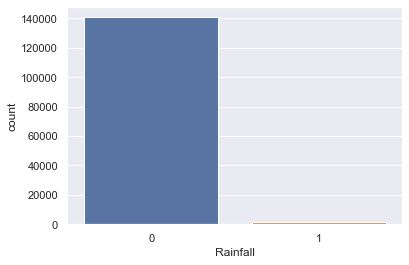

0    81350
1    60843
Name: Evaporation, dtype: int64


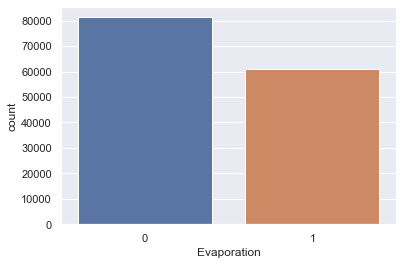

0    74377
1    67816
Name: Sunshine, dtype: int64


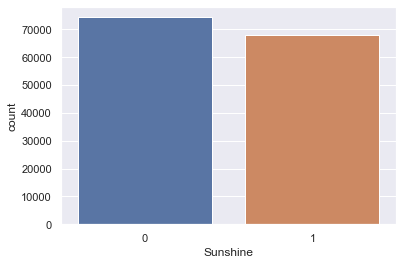

0    132863
1      9330
Name: WindGustDir, dtype: int64


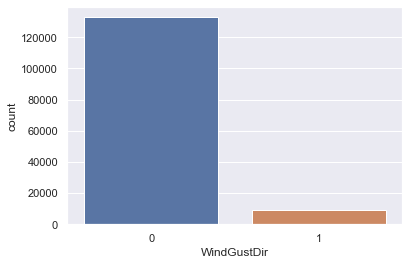

0    132923
1      9270
Name: WindGustSpeed, dtype: int64


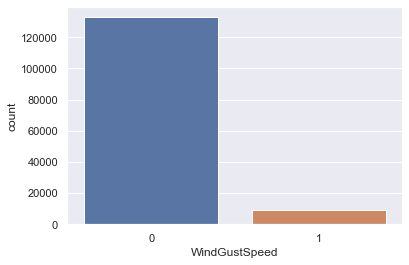

0    132180
1     10013
Name: WindDir9am, dtype: int64


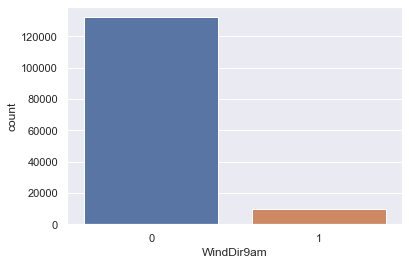

0    138415
1      3778
Name: WindDir3pm, dtype: int64


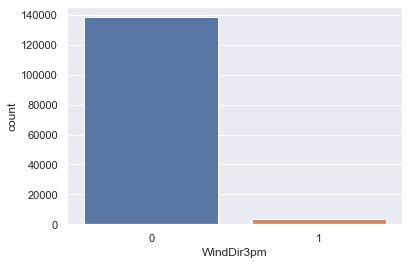

0    140845
1      1348
Name: WindSpeed9am, dtype: int64


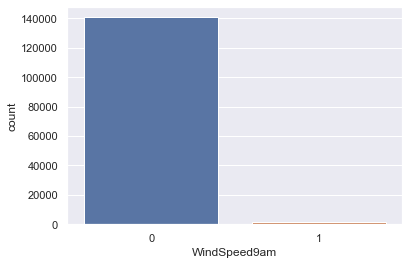

0    139563
1      2630
Name: WindSpeed3pm, dtype: int64


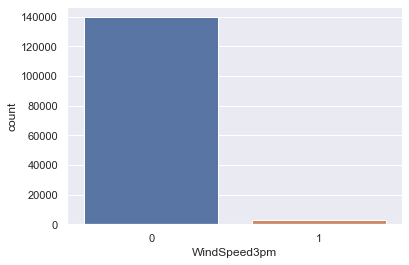

0    140419
1      1774
Name: Humidity9am, dtype: int64


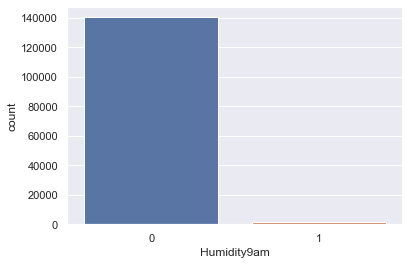

0    138583
1      3610
Name: Humidity3pm, dtype: int64


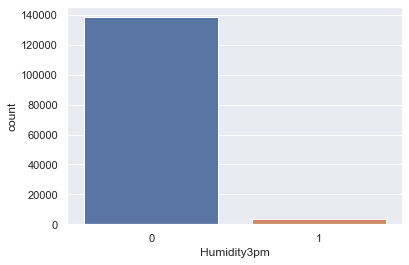

0    128179
1     14014
Name: Pressure9am, dtype: int64


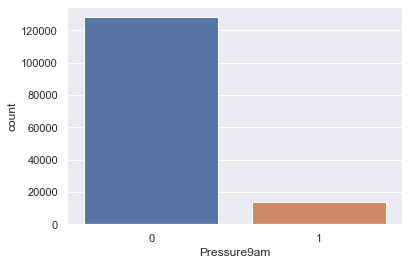

0    128212
1     13981
Name: Pressure3pm, dtype: int64


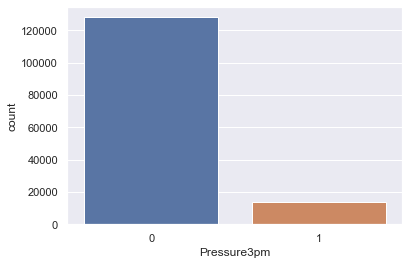

0    88536
1    53657
Name: Cloud9am, dtype: int64


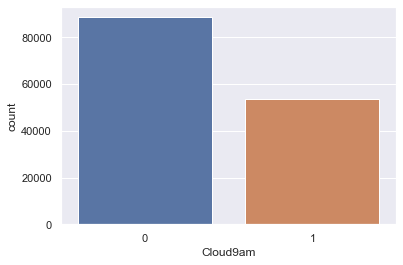

0    85099
1    57094
Name: Cloud3pm, dtype: int64


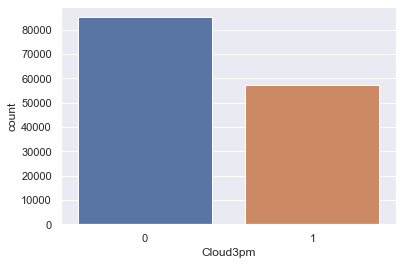

0    141289
1       904
Name: Temp9am, dtype: int64


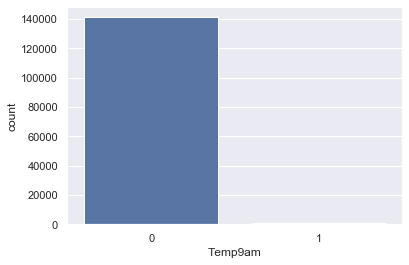

0    139467
1      2726
Name: Temp3pm, dtype: int64


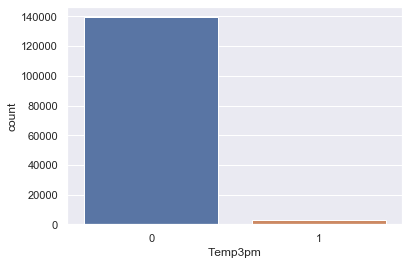

0    140787
1      1406
Name: RainToday, dtype: int64


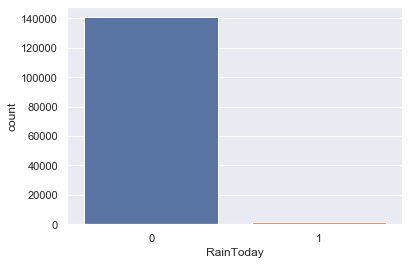

In [5]:
data=dataset.copy()
for feature in nan_feature:
    data[feature]=np.where(data[feature].isnull(),1,0)
    print(data[feature].value_counts())
    sns.countplot(data[feature])
    plt.show()
        

# Categorical features

In [6]:
cat_feature=[feature for feature in dataset.columns if dataset[feature].dtypes == "O" and feature!='Date' and feature != 'Location']
cat_feature

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

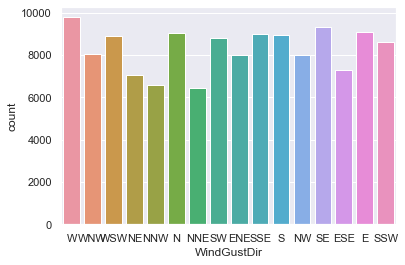

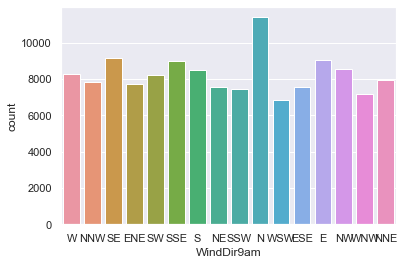

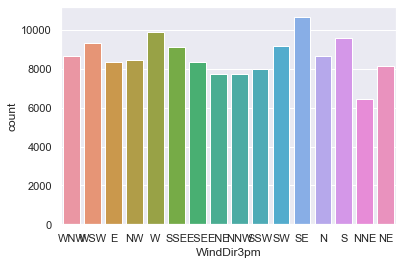

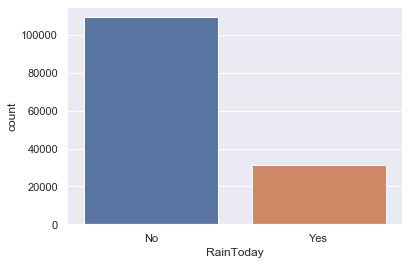

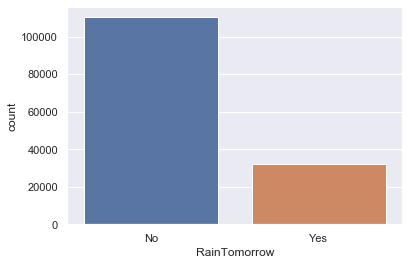

In [7]:
for feature in cat_feature:
    sns.countplot(dataset[feature])
    plt.show()

In [8]:
for feature in cat_feature:
    print(feature,len(dataset[feature].unique()))
print('Location',len(dataset['Location'].unique()))

WindGustDir 17
WindDir9am 17
WindDir3pm 17
RainToday 3
RainTomorrow 2
Location 49


# Numerical feature

In [9]:
dataset.drop('RISK_MM',axis=1,inplace=True)
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [10]:
num_feature=[feature for feature in dataset.columns if dataset[feature].dtypes != "O" ]
num_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [11]:
cont_feature=[feature for feature in num_feature if len(dataset[feature].unique())>25 ]
cont_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

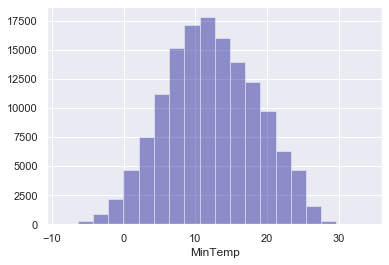

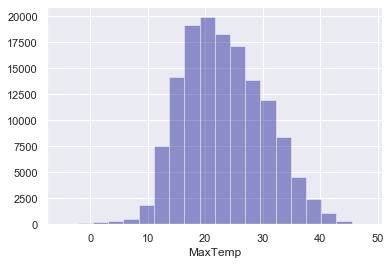

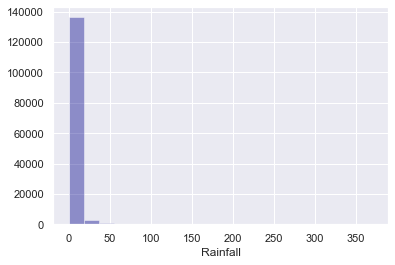

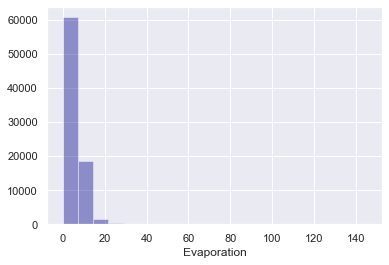

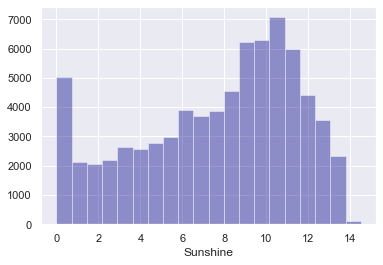

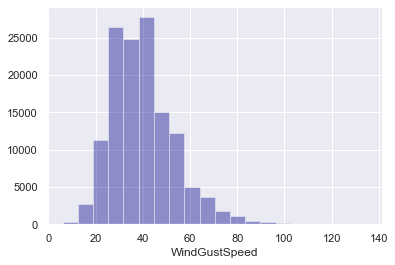

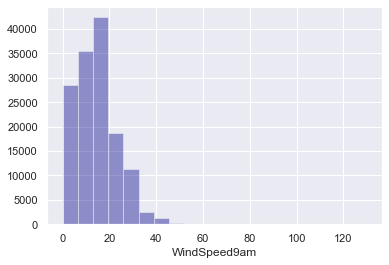

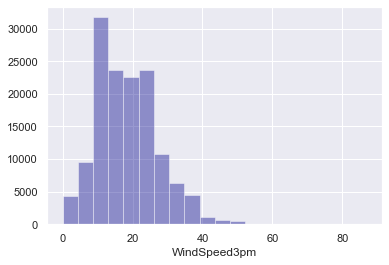

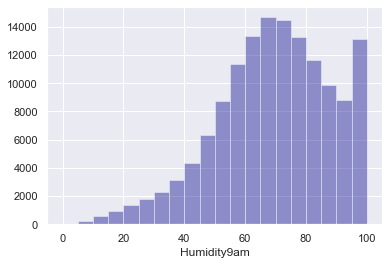

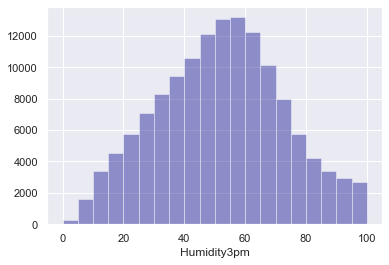

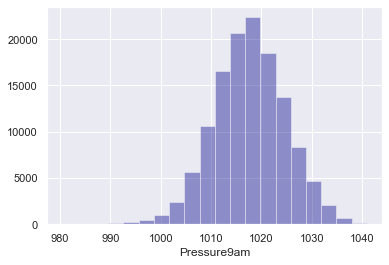

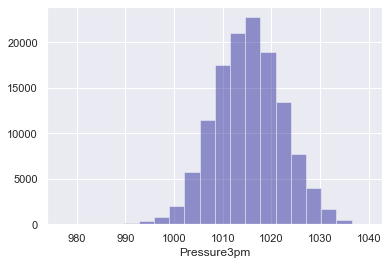

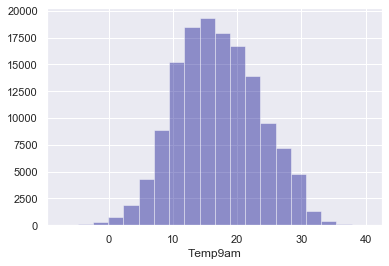

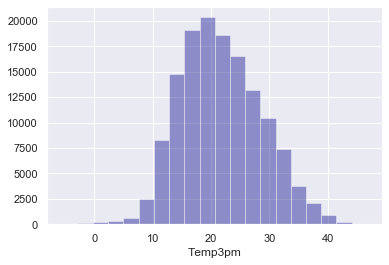

In [12]:
for feature in cont_feature:
    sns.distplot(dataset[feature].dropna(),kde=False,bins=20,color='darkblue')
    plt.show()

In [13]:
Disc_feature=[feature for feature in num_feature if len(dataset[feature].unique())<25 ]
Disc_feature

['Cloud9am', 'Cloud3pm']

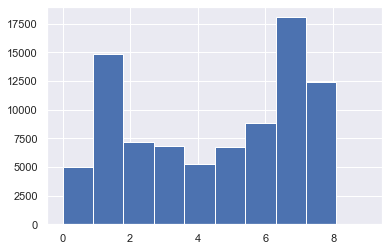

In [14]:
dataset['Cloud3pm'].hist(bins=10)
plt.show()

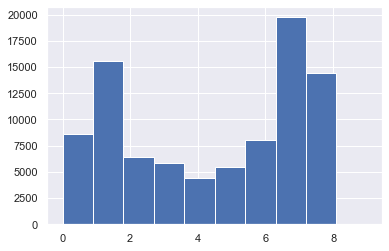

In [15]:
dataset['Cloud9am'].hist()
plt.show()

so here we have 2 discrete feature 

In [16]:
len(dataset['Cloud9am'].dropna().unique())

10

In [17]:
len(dataset['Cloud3pm'].dropna().unique())

10

# Temporal Feature

In [18]:
dataset['Date'].head()

0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
Name: Date, dtype: object

In [19]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['Date'].head()

0   2008-12-01
1   2008-12-02
2   2008-12-03
3   2008-12-04
4   2008-12-05
Name: Date, dtype: datetime64[ns]

In [20]:
dataset['Year']=dataset['Date'].dt.year
dataset['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [21]:
dataset['Month']=dataset['Date'].dt.month
dataset['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [22]:
dataset['Day']=dataset['Date'].dt.day
dataset['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [23]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [24]:
dataset.drop('Date',axis=1,inplace=True)
dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


# Ouliers

In [25]:
dataset[cont_feature].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


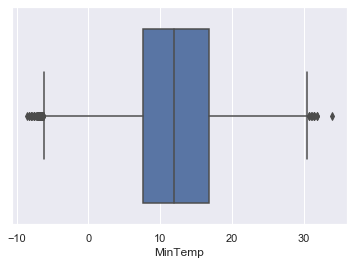

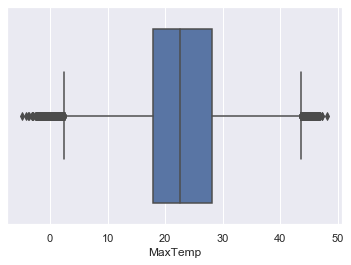

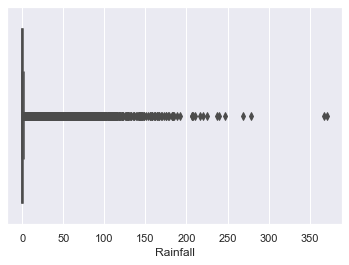

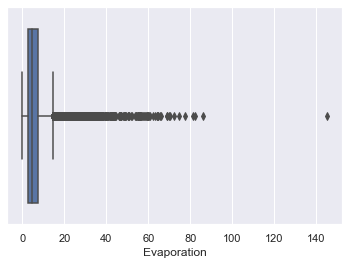

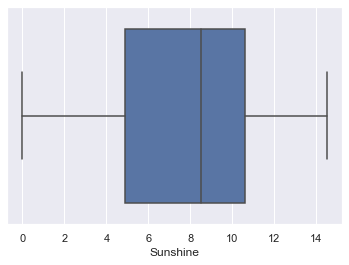

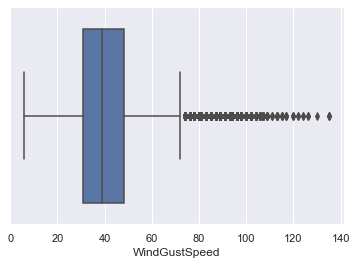

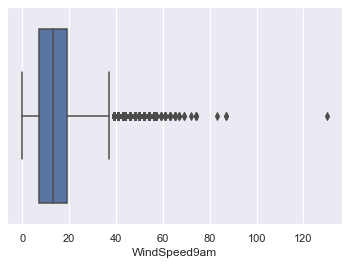

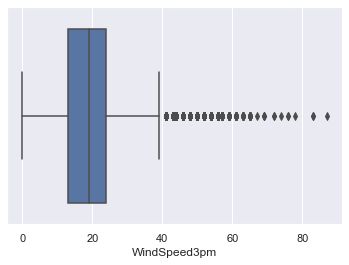

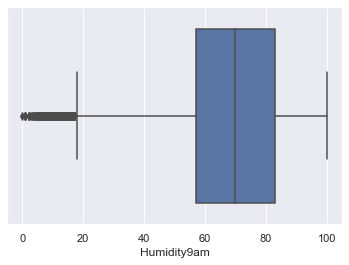

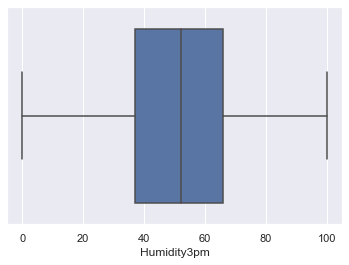

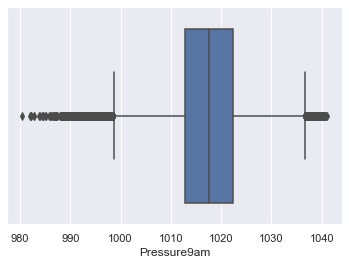

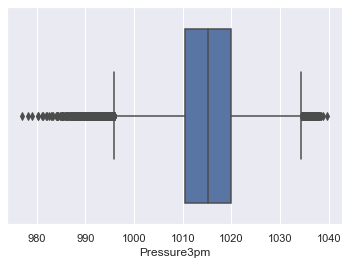

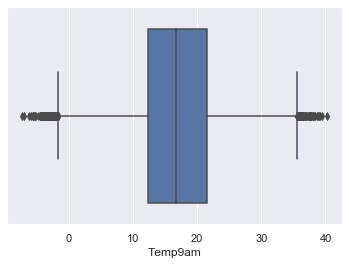

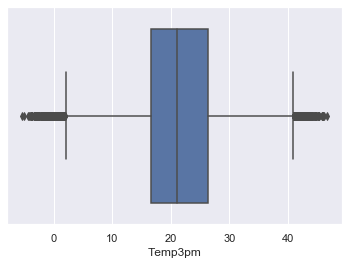

In [26]:
for feature in cont_feature:
    sns.boxplot(dataset[feature])
    plt.show()

From above histogram analysis of continuous features we found that there are four skewed features so we use interquantile range approach to deal with these skewed feature ouliers. 

In [27]:
IQR_feature=dataset[['Rainfall','Evaporation','WindSpeed9am','WindSpeed3pm']]

In [28]:
for feature in IQR_feature:
    IQR=dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
    lower_fence=dataset[feature].quantile(0.25) - (IQR * 3)
    upper_fence=dataset[feature].quantile(0.25) + (IQR * 3)
    print('{} ouliers are < {} and > {}'.format(feature,lower_fence,upper_fence))

Rainfall ouliers are < -2.4000000000000004 and > 2.4000000000000004
Evaporation ouliers are < -11.800000000000002 and > 17.000000000000004
WindSpeed9am ouliers are < -29.0 and > 43.0
WindSpeed3pm ouliers are < -20.0 and > 46.0


# Multivarient Analysis

In [29]:
cor=dataset.corr()

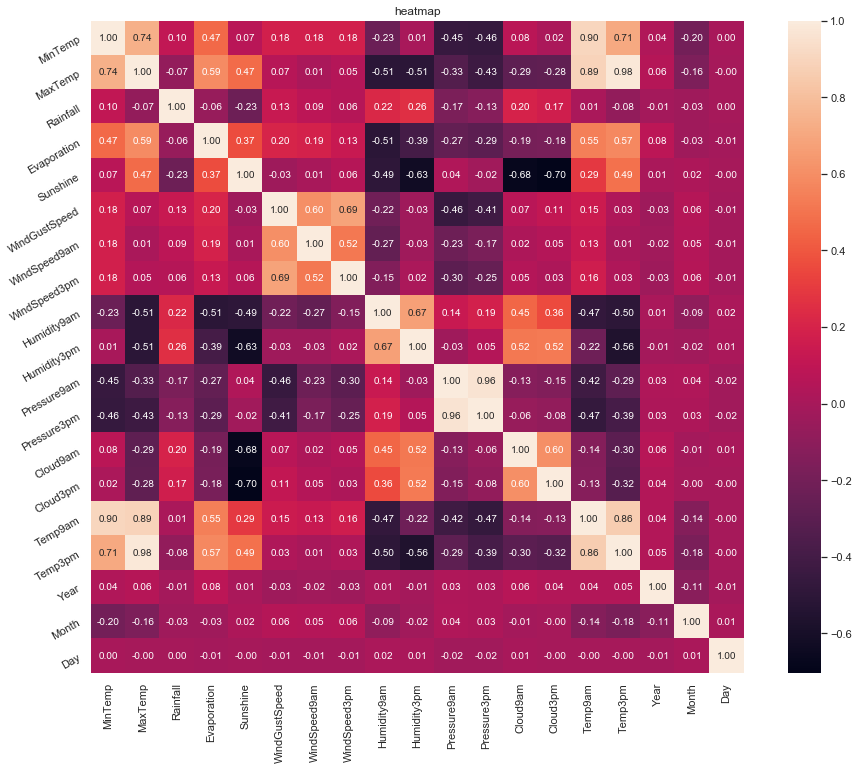

In [30]:
plt.figure(figsize=(16,12))
plt.title('heatmap')
ax=sns.heatmap(cor,square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_yticklabels(ax.get_yticklabels(),rotation=30)
plt.show()

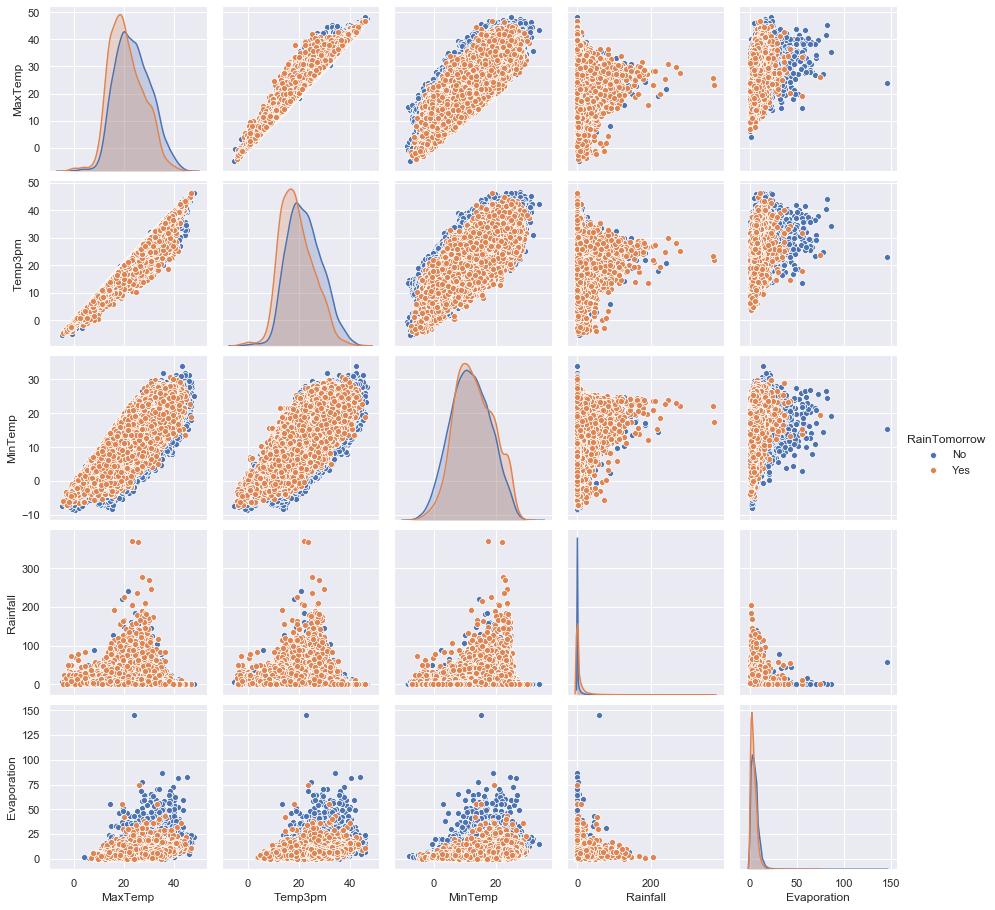

In [33]:
g=sns.pairplot(dataset, vars=["MaxTemp", "Temp3pm",'MinTemp','Rainfall','Evaporation'],hue='RainTomorrow')

# Handling imbalance dataset

In [31]:
dataset["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [32]:
y=dataset.iloc[:,-4]
y.head()

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

In [33]:
X=dataset.iloc[:,0:21]
X[['Year','Month','Day']]=dataset[['Year',"Month",'Day']]
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,2008,12,5


In [34]:
print(X.shape)
print(y.shape)

(142193, 24)
(142193,)


Now I will do over sampling to handle imbalance dataset

In [35]:
from imblearn.combine import SMOTETomek

we will handle this imbalanced dataset after featrue engineering

# Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [37]:
y_test.isnull().sum()

0

# Feature Engineering

# Handling Missing Values

In [38]:
nan_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [39]:
num_nan_feature=[feature for feature in X[nan_feature].columns if X[feature].dtypes != 'O']

In [40]:
num_nan_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

So there are ouliers in the dataset so we fill missing values with the median

In [41]:
for feature in num_nan_feature:
    median_value=x_train[feature].median()
    x_train[feature].fillna(median_value,inplace=True)
    
x_train[num_nan_feature].isnull().sum()

C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [42]:
cat_nan_feature=[feature for feature in x_train[nan_feature].columns if x_train[feature].dtypes == 'O']

In [43]:
cat_nan_feature

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [44]:
for feature in cat_nan_feature:
    mode=x_train[feature].mode()[0]
    print(mode)
    x_train[feature].replace(np.nan,mode,inplace=True)
    

x_train[cat_nan_feature].isnull().sum()

        

W
N
SE
No


C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [45]:
x_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

# Handling skewed values in numerical features

In [46]:
x_train[num_feature].columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


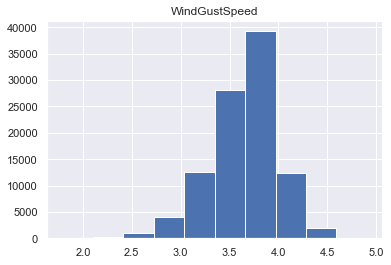

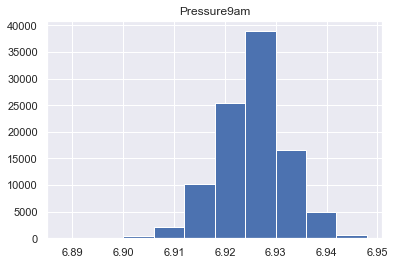

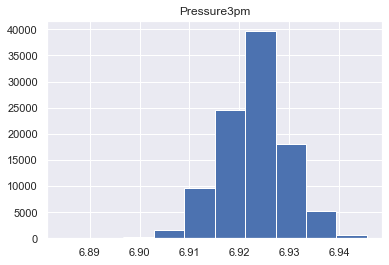

In [47]:
for feature in num_feature:
    if 0 in x_train[feature].unique():
        pass
    else:
        x_train[feature]=np.log(x_train[feature])
        x_train[feature].hist()
        plt.title(feature)
        plt.show()

In [48]:
x_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
98248,MountGambier,8.2,15.0,0.0,1.2,4.0,NNE,4.077537,NNE,N,...,6.918794,6.914929,7.0,7.0,10.3,11.0,No,2012,7,25
141508,Uluru,7.7,29.4,0.0,4.8,8.5,NNE,3.433987,SSE,NE,...,6.930104,6.925202,5.0,5.0,15.1,28.5,No,2015,7,31
72091,Nhil,0.2,14.0,0.0,4.8,8.5,SE,3.663562,SSE,SSE,...,6.936731,6.934105,5.0,5.0,6.7,13.4,No,2015,8,29
118996,Perth,23.7,40.1,0.0,9.2,12.6,ENE,3.555348,ENE,W,...,6.919783,6.916319,2.0,2.0,30.3,34.8,No,2012,2,10
102995,Woomera,18.5,35.6,0.0,15.2,13.5,SE,3.433987,ENE,W,...,6.923924,6.920672,0.0,1.0,25.8,34.0,No,2009,1,18


# Handling categorical feature

In [49]:
cat_feature=[feature for feature in x_train.columns if x_train[feature].dtypes == "O"]
print(cat_feature)
cat_feature=cat_feature[0:4]
cat_feature

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [50]:
df_cat=pd.get_dummies(x_train[cat_feature],drop_first=True)
df_cat.head()

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
98248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
118996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
102995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
df=pd.concat([df_cat,pd.get_dummies(x_train['RainToday'])],axis=1)
df.head()

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,No,Yes
98248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
141508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
72091,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
118996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
102995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [52]:
df.rename({'No':'Rain_today_No','Yes':'Rain_today_Yes'},axis='columns',inplace=True)

In [53]:
df.head()

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Rain_today_No,Rain_today_Yes
98248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
141508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
72091,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
118996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
102995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [54]:
x_train.drop(cat_feature,axis=1,inplace=True)
x_train.head()

C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
98248,8.2,15.0,0.0,1.2,4.0,4.077537,17.0,19.0,72.0,87.0,6.918794,6.914929,7.0,7.0,10.3,11.0,No,2012,7,25
141508,7.7,29.4,0.0,4.8,8.5,3.433987,7.0,17.0,40.0,16.0,6.930104,6.925202,5.0,5.0,15.1,28.5,No,2015,7,31
72091,0.2,14.0,0.0,4.8,8.5,3.663562,15.0,20.0,71.0,35.0,6.936731,6.934105,5.0,5.0,6.7,13.4,No,2015,8,29
118996,23.7,40.1,0.0,9.2,12.6,3.555348,15.0,13.0,35.0,34.0,6.919783,6.916319,2.0,2.0,30.3,34.8,No,2012,2,10
102995,18.5,35.6,0.0,15.2,13.5,3.433987,20.0,7.0,12.0,8.0,6.923924,6.920672,0.0,1.0,25.8,34.0,No,2009,1,18


In [55]:
x_train.drop('RainToday',axis=1,inplace=True)
x_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
98248,8.2,15.0,0.0,1.2,4.0,4.077537,17.0,19.0,72.0,87.0,6.918794,6.914929,7.0,7.0,10.3,11.0,2012,7,25
141508,7.7,29.4,0.0,4.8,8.5,3.433987,7.0,17.0,40.0,16.0,6.930104,6.925202,5.0,5.0,15.1,28.5,2015,7,31
72091,0.2,14.0,0.0,4.8,8.5,3.663562,15.0,20.0,71.0,35.0,6.936731,6.934105,5.0,5.0,6.7,13.4,2015,8,29
118996,23.7,40.1,0.0,9.2,12.6,3.555348,15.0,13.0,35.0,34.0,6.919783,6.916319,2.0,2.0,30.3,34.8,2012,2,10
102995,18.5,35.6,0.0,15.2,13.5,3.433987,20.0,7.0,12.0,8.0,6.923924,6.920672,0.0,1.0,25.8,34.0,2009,1,18


In [56]:
x_train=pd.concat([x_train,df],axis=1)
x_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Rain_today_No,Rain_today_Yes
98248,8.2,15.0,0.0,1.2,4.0,4.077537,17.0,19.0,72.0,87.0,...,0,0,0,0,0,0,0,0,1,0
141508,7.7,29.4,0.0,4.8,8.5,3.433987,7.0,17.0,40.0,16.0,...,0,0,0,0,0,0,0,0,1,0
72091,0.2,14.0,0.0,4.8,8.5,3.663562,15.0,20.0,71.0,35.0,...,0,0,1,0,0,0,0,0,1,0
118996,23.7,40.1,0.0,9.2,12.6,3.555348,15.0,13.0,35.0,34.0,...,0,0,0,0,0,1,0,0,1,0
102995,18.5,35.6,0.0,15.2,13.5,3.433987,20.0,7.0,12.0,8.0,...,0,0,0,0,0,1,0,0,1,0


In [57]:
y_train.head()

98248     Yes
141508     No
72091      No
118996     No
102995     No
Name: RainTomorrow, dtype: object

In [58]:
dict_map={"Yes":1,"No":0}
y_train=y_train.map(dict_map)
y_train.value_counts()

0    77241
1    22294
Name: RainTomorrow, dtype: int64

Now here we handle imbalance dataset

In [59]:
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(x_train,y_train)

In [60]:
print(x_train.shape)
X_res.shape

(99535, 114)


(154034, 114)

In [61]:
X_res.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Rain_today_No,Rain_today_Yes
154029,23.631227,33.571122,89.211907,9.270392,6.804334,3.609404,10.936815,13.624543,88.166058,62.019844,...,0,0,0,0,0,0,0,0,0,1
154030,11.680248,19.697790,13.742818,4.294475,6.958150,3.759482,37.000000,39.483426,60.747238,50.252762,...,0,1,0,0,0,0,0,0,0,1
154031,4.096300,17.061980,0.929880,4.800000,8.500000,3.147139,0.000000,9.671600,98.321001,56.992600,...,0,0,0,0,0,0,0,0,0,0
154032,3.981164,15.014216,0.000000,4.800000,8.500000,4.211239,11.366948,31.000000,88.142160,52.816526,...,0,0,0,0,0,0,0,0,1,0
154033,12.810825,20.006661,3.583347,3.991673,8.368358,4.043338,20.033307,32.958366,93.000000,64.024980,...,0,0,0,0,0,0,0,0,0,1


In [62]:
X_res.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Rain_today_No,Rain_today_Yes
count,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,...,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000
mean,12.556508,22.468874,3.562260,4.966485,7.472977,3.675558,14.518797,19.106643,72.101995,57.533430,...,0.046165,0.074347,0.043821,0.037959,0.043432,0.048613,0.042393,0.044769,0.659634,0.265636
std,6.295944,7.040224,10.629355,2.868551,2.933447,0.329798,8.998426,8.899348,18.368797,21.518296,...,0.209843,0.262336,0.204698,0.191098,0.203828,0.215058,0.201485,0.206798,0.473834,0.441673
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.066123,17.253035,0.000000,3.851019,6.564102,3.493833,7.590815,13.000000,61.000000,43.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.200000,21.790806,0.000000,4.800000,8.500000,3.663562,13.000000,19.000000,73.000000,58.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,17.197402,27.400000,2.131265,5.000000,8.500000,3.895178,20.000000,24.000000,86.701643,73.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,33.900000,48.100000,268.600000,145.000000,14.500000,4.905275,130.000000,83.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Removing Outliers

In [63]:
def out (df,feature,top):
    df[feature]=np.where(df[feature]>top,top,df[feature])
    return df[feature]

X_res['Rainfall']=out(X_res,'Rainfall',2.40)
X_res['Evaporation']=out(X_res,'Evaporation',17.0)
X_res['WindSpeed9am']=out(X_res,'WindSpeed9am',43.0)
X_res['WindSpeed3pm']=out(X_res,'WindSpeed3pm',46.0)
print(X_res['Rainfall'].max(),
X_res['Evaporation'].max(),
X_res['WindSpeed9am'].max(),
X_res['WindSpeed3pm'].max(),
)

2.4 17.0 43.0 46.0


# Feature scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [65]:
cols=x_train.columns
X_res=scale.fit_transform(X_res,y_res)

In [66]:
X_res=pd.DataFrame(X_res,columns=[cols])

In [67]:
X_res.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Rain_today_No,Rain_today_Yes
0,0.393868,0.374291,0.0,0.070588,0.275862,0.734147,0.395349,0.413043,0.72,0.87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.382075,0.646503,0.0,0.282353,0.586207,0.527451,0.162791,0.369565,0.40,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.205189,0.355388,0.0,0.282353,0.586207,0.601186,0.348837,0.434783,0.71,0.35,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.759434,0.848771,0.0,0.541176,0.868966,0.566430,0.348837,0.282609,0.35,0.34,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.636792,0.763705,0.0,0.894118,0.931034,0.527451,0.465116,0.152174,0.12,0.08,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [68]:
X_res.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Rain_today_No,Rain_today_Yes
count,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,...,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000,154034.000000
mean,0.496616,0.515480,0.319439,0.289661,0.515378,0.605039,0.336732,0.414547,0.721020,0.575334,...,0.046165,0.074347,0.043821,0.037959,0.043432,0.048613,0.042393,0.044769,0.659634,0.265636
std,0.148489,0.133086,0.425359,0.146716,0.202307,0.105925,0.205705,0.190512,0.183688,0.215183,...,0.209843,0.262336,0.204698,0.191098,0.203828,0.215058,0.201485,0.206798,0.473834,0.441673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.390710,0.416882,0.000000,0.226531,0.452697,0.546672,0.176531,0.282609,0.610000,0.430000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.488208,0.502662,0.000000,0.282353,0.586207,0.601186,0.302326,0.413043,0.730000,0.580000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.606071,0.608696,0.888027,0.294118,0.586207,0.675577,0.465116,0.521739,0.867016,0.730000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Test Data

In [69]:
num_nan_feature=[feature for feature in X[nan_feature].columns if X[feature].dtypes != 'O']

In [70]:
num_nan_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [71]:
for feature in num_nan_feature:
    median_value=x_test[feature].median()
    x_test[feature].fillna(median_value,inplace=True)
    
x_test[num_nan_feature].isnull().sum()

C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [72]:
cat_nan_feature=[feature for feature in x_test[nan_feature].columns if x_test[feature].dtypes == 'O']

In [73]:
x_test[cat_nan_feature].isnull().sum()

WindGustDir    2793
WindDir9am     2952
WindDir3pm     1110
RainToday       396
dtype: int64

In [74]:
for feature in cat_nan_feature:
    mode=x_test[feature].mode()[0]
    print(mode)
    x_test[feature].replace(np.nan,mode,inplace=True)
    

x_test[cat_nan_feature].isnull().sum()


W
N
SE
No


C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [75]:
x_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


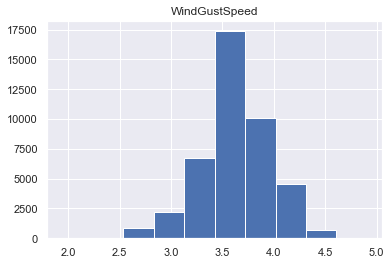

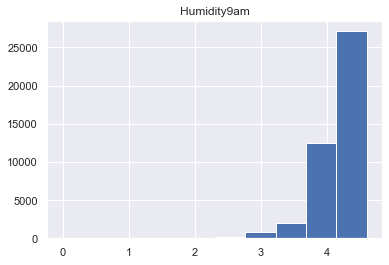

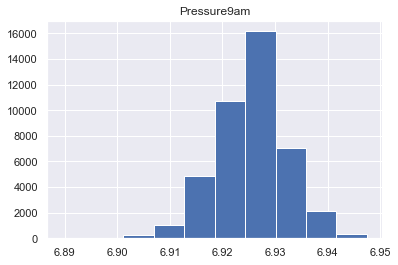

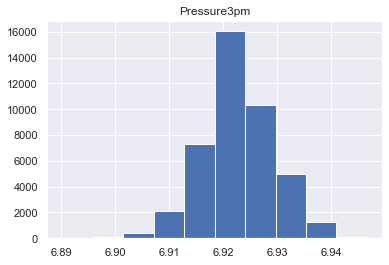

In [76]:
for feature in num_feature:
    if 0 in x_test[feature].unique():
        pass
    else:
        x_test[feature]=np.log(x_test[feature])
        x_test[feature].hist()
        plt.title(feature)
        plt.show()

In [77]:
cat_feature=[feature for feature in x_test.columns if x_test[feature].dtypes == "O"]
print(cat_feature)
cat_feature=cat_feature[0:4]
cat_feature

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [78]:
t_df_cat=pd.get_dummies(x_test[cat_feature],drop_first=True)
t_df_cat.head()

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
42869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
117098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1749,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df1=pd.concat([t_df_cat,pd.get_dummies(x_test['RainToday'])],axis=1)
df1.head()

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,No,Yes
42869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
117098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1749,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
71542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
13951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [80]:
df1.rename({'No':'Rain_today_No','Yes':'Rain_today_Yes'},axis='columns',inplace=True)

In [81]:
df1.head()

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Rain_today_No,Rain_today_Yes
42869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
117098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1749,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
71542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
13951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [82]:
x_test.drop(cat_feature,axis=1,inplace=True)
x_test.head()

C:\Users\Osama\Anaconda3\envs\notebook-6.0.2\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
42869,10.9,20.4,0.0,4.8,8.5,4.382027,13.0,28.0,4.043051,39.0,6.917309,6.913340,1.0,5.0,17.1,18.8,No,2013,5,16
117098,14.9,28.5,0.6,6.4,12.0,3.871201,22.0,15.0,4.007333,34.0,6.926577,6.922841,2.0,1.0,20.3,27.7,No,2015,10,26
1749,12.0,27.4,0.0,4.8,8.5,3.761200,11.0,20.0,4.025352,38.0,6.918794,6.916319,5.0,1.0,20.3,25.9,No,2014,1,1
71542,12.5,21.3,0.0,4.8,8.5,4.174387,30.0,22.0,4.442651,82.0,6.910252,6.910352,5.0,5.0,15.5,13.1,No,2014,2,19
13951,18.1,33.6,0.2,41.2,12.5,3.610918,26.0,9.0,4.158883,33.0,6.924022,6.920178,1.0,3.0,23.4,31.2,No,2015,2,16


In [83]:
x_test.drop('RainToday',axis=1,inplace=True)
x_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
42869,10.9,20.4,0.0,4.8,8.5,4.382027,13.0,28.0,4.043051,39.0,6.917309,6.913340,1.0,5.0,17.1,18.8,2013,5,16
117098,14.9,28.5,0.6,6.4,12.0,3.871201,22.0,15.0,4.007333,34.0,6.926577,6.922841,2.0,1.0,20.3,27.7,2015,10,26
1749,12.0,27.4,0.0,4.8,8.5,3.761200,11.0,20.0,4.025352,38.0,6.918794,6.916319,5.0,1.0,20.3,25.9,2014,1,1
71542,12.5,21.3,0.0,4.8,8.5,4.174387,30.0,22.0,4.442651,82.0,6.910252,6.910352,5.0,5.0,15.5,13.1,2014,2,19
13951,18.1,33.6,0.2,41.2,12.5,3.610918,26.0,9.0,4.158883,33.0,6.924022,6.920178,1.0,3.0,23.4,31.2,2015,2,16


In [84]:
x_test=pd.concat([x_test,df1],axis=1)
x_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Rain_today_No,Rain_today_Yes
42869,10.9,20.4,0.0,4.8,8.5,4.382027,13.0,28.0,4.043051,39.0,...,0,0,0,0,0,0,1,0,1,0
117098,14.9,28.5,0.6,6.4,12.0,3.871201,22.0,15.0,4.007333,34.0,...,0,0,0,0,0,0,0,0,1,0
1749,12.0,27.4,0.0,4.8,8.5,3.761200,11.0,20.0,4.025352,38.0,...,0,0,0,0,0,0,0,0,1,0
71542,12.5,21.3,0.0,4.8,8.5,4.174387,30.0,22.0,4.442651,82.0,...,0,0,0,0,0,1,0,0,1,0
13951,18.1,33.6,0.2,41.2,12.5,3.610918,26.0,9.0,4.158883,33.0,...,0,0,0,0,0,0,0,0,1,0


In [85]:
dict_map={"Yes":1,"No":0}
y_test=y_test.map(dict_map)
y_test.value_counts()

0    33075
1     9583
Name: RainTomorrow, dtype: int64

In [86]:
y_test.head()

42869     0
117098    0
1749      0
71542     1
13951     0
Name: RainTomorrow, dtype: int64

In [87]:
y_test.isnull().sum()

0

In [88]:
def out (df,feature,top):
    df[feature]=np.where(df[feature]>top,top,df[feature])
    return df[feature]

x_test['Rainfall']=out(x_test,'Rainfall',2.40)
x_test['Evaporation']=out(x_test,'Evaporation',17.0)
x_test['WindSpeed9am']=out(x_test,'WindSpeed9am',43.0)
x_test['WindSpeed3pm']=out(x_test,'WindSpeed3pm',46.0)
print(x_test['Rainfall'].max(),
x_test['Evaporation'].max(),
x_test['WindSpeed9am'].max(),
x_test['WindSpeed3pm'].max(),
)

2.4 17.0 43.0 46.0


In [89]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [90]:
cols=x_test.columns
X_test=scale.fit_transform(x_test)

In [91]:
X_test=pd.DataFrame(X_test,columns=[cols])

In [92]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Rain_today_No,Rain_today_Yes
0,0.482323,0.476378,0.000000,0.282353,0.594406,0.823189,0.302326,0.608696,0.877937,0.39,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.583333,0.635827,0.250000,0.376471,0.839161,0.650576,0.511628,0.326087,0.870181,0.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.510101,0.614173,0.000000,0.282353,0.594406,0.613405,0.255814,0.434783,0.874094,0.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.522727,0.494094,0.000000,0.282353,0.594406,0.753026,0.697674,0.478261,0.964709,0.82,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.664141,0.736220,0.083333,1.000000,0.874126,0.562623,0.604651,0.195652,0.903090,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [93]:
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Rain_today_No,Rain_today_Yes
count,42658.000000,42658.000000,42658.000000,42658.000000,42658.000000,42658.000000,42658.000000,42658.000000,42658.000000,42658.000000,...,42658.000000,42658.000000,42658.000000,42658.000000,42658.000000,42658.000000,42658.000000,42658.000000,42658.000000,42658.000000
mean,0.512894,0.530889,0.231502,0.300705,0.562606,0.569563,0.323689,0.404720,0.908132,0.514725,...,0.067186,0.101364,0.062731,0.056777,0.064912,0.069881,0.061794,0.066482,0.776173,0.223827
std,0.161552,0.139808,0.387170,0.158260,0.193110,0.112649,0.202762,0.188144,0.076338,0.205442,...,0.250346,0.301814,0.242482,0.231419,0.246373,0.254950,0.240783,0.249126,0.416812,0.416812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.396465,0.427165,0.000000,0.235294,0.573427,0.502837,0.162791,0.282609,0.877937,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.507576,0.519685,0.000000,0.282353,0.594406,0.580412,0.302326,0.413043,0.922549,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.628788,0.627953,0.333333,0.317647,0.608392,0.636194,0.441860,0.521739,0.959539,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
print(X_res.shape,y_res.shape)
print(X_test.shape,y_test.shape)

(154034, 114) (154034,)
(42658, 114) (42658,)


# Modeling

In [138]:
from sklearn.linear_model import LogisticRegression
regg=LogisticRegression(C=0.01, solver='liblinear', random_state=0)

In [139]:
regg.fit(X_res,y_res)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [140]:
clasf=reg.predict(X_test)

In [141]:
clasf

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

# Measuring Accuracy

In [142]:
 #print the scores on training and test set

print('Training set score: {:.4f}'.format(regg.score(X_res, y_res)))

print('Test set score: {:.4f}'.format(regg.score(X_test, y_test)))

Training set score: 0.8852
Test set score: 0.8202


In [143]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, clasf)))

Model accuracy score: 0.8202


now tunning the C parameter of model to check the accuracy

In [144]:
regg1=LogisticRegression(C=1, solver='liblinear', random_state=0)

In [145]:
regg1.fit(X_res,y_res)

LogisticRegression(C=1, random_state=0, solver='liblinear')

In [146]:
Y_hat=regg1.predict(X_test)

In [147]:

print('Training set score: {:.4f}'.format(regg1.score(X_res, y_res)))

print('Test set score: {:.4f}'.format(regg1.score(X_test, y_test)))

Training set score: 0.8910
Test set score: 0.8156


In [150]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     33075
           1       0.58      0.65      0.61      9583

    accuracy                           0.82     42658
   macro avg       0.74      0.76      0.75     42658
weighted avg       0.82      0.82      0.82     42658



In [151]:
from sklearn.metrics import confusion_matrix

In [152]:
cm=confusion_matrix(y_test,Y_hat)
cm

array([[28521,  4554],
       [ 3311,  6272]], dtype=int64)

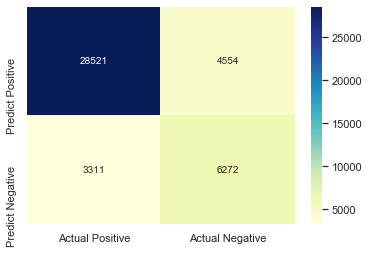

In [153]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# So this model is giving a 82% accuracy which is pretty much good.